# || CAR SPEED DETECTION ||

# Task 1: Problem Identification and Data Gathering

Project Objective:

* Install the Libraries

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.1/872.1 kB 12.3 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
from IPython.display import Image, display
from IPython import display
display.clear_output()

import cv2
import numpy as np
import time

# we try to do custom model

# Task 2: Exploratory Data Analysis (EDA)

* Load the dataset

In [ ]:
!pip install roboflow

# Data with agumentation:
from roboflow import Roboflow
rf = Roboflow(api_key="kjiMYVEB3Ma72nnTda0J")
project = rf.workspace("detection-oovz8").project("yolov5-02-xzfd5")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
loading Roboflow workspace...
loading Roboflow project...
Generating version still in progress. Progress: 100.0%
Dependency ultralytics==8.0.196 is required but found version=8.2.87, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Yolov5-02-1 in yolov8:: 100%|██████████| 6060/6060 [00:01<00:00, 4924.64it/s]


# Task 3: Model Development

* train the model with the dataset

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=30   imgsz=600

Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Yolov5-02-1/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=600, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

* Save the model

In [ ]:
!zip -r /content/runs/detect/train.zip /content/runs/detect/train

  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/val_batch1_labels.jpg (deflated 12%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/best.pt (deflated 9%)
  adding: content/runs/detect/train/weights/last.pt (deflated 9%)
  adding: content/runs/detect/train/labels.jpg (deflated 35%)
  adding: content/runs/detect/train/PR_curve.png (deflated 13%)
  adding: content/runs/detect/train/val_batch0_pred.jpg (deflated 12%)
  adding: content/runs/detect/train/R_curve.png (deflated 10%)
  adding: content/runs/detect/train/train_batch2.jpg (deflated 10%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 37%)
  adding: content/runs/detect/train/confusion_matrix_normalized.png (deflated 25%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 12%)
  adding: content/runs/detect/train/events.out.tfevents.1725427087.87fa43f381ec.7419.0 (deflated 92%)
  adding: content/runs/detect

# Task 4: Model Evaluation and Selection

* Evaluate model performance

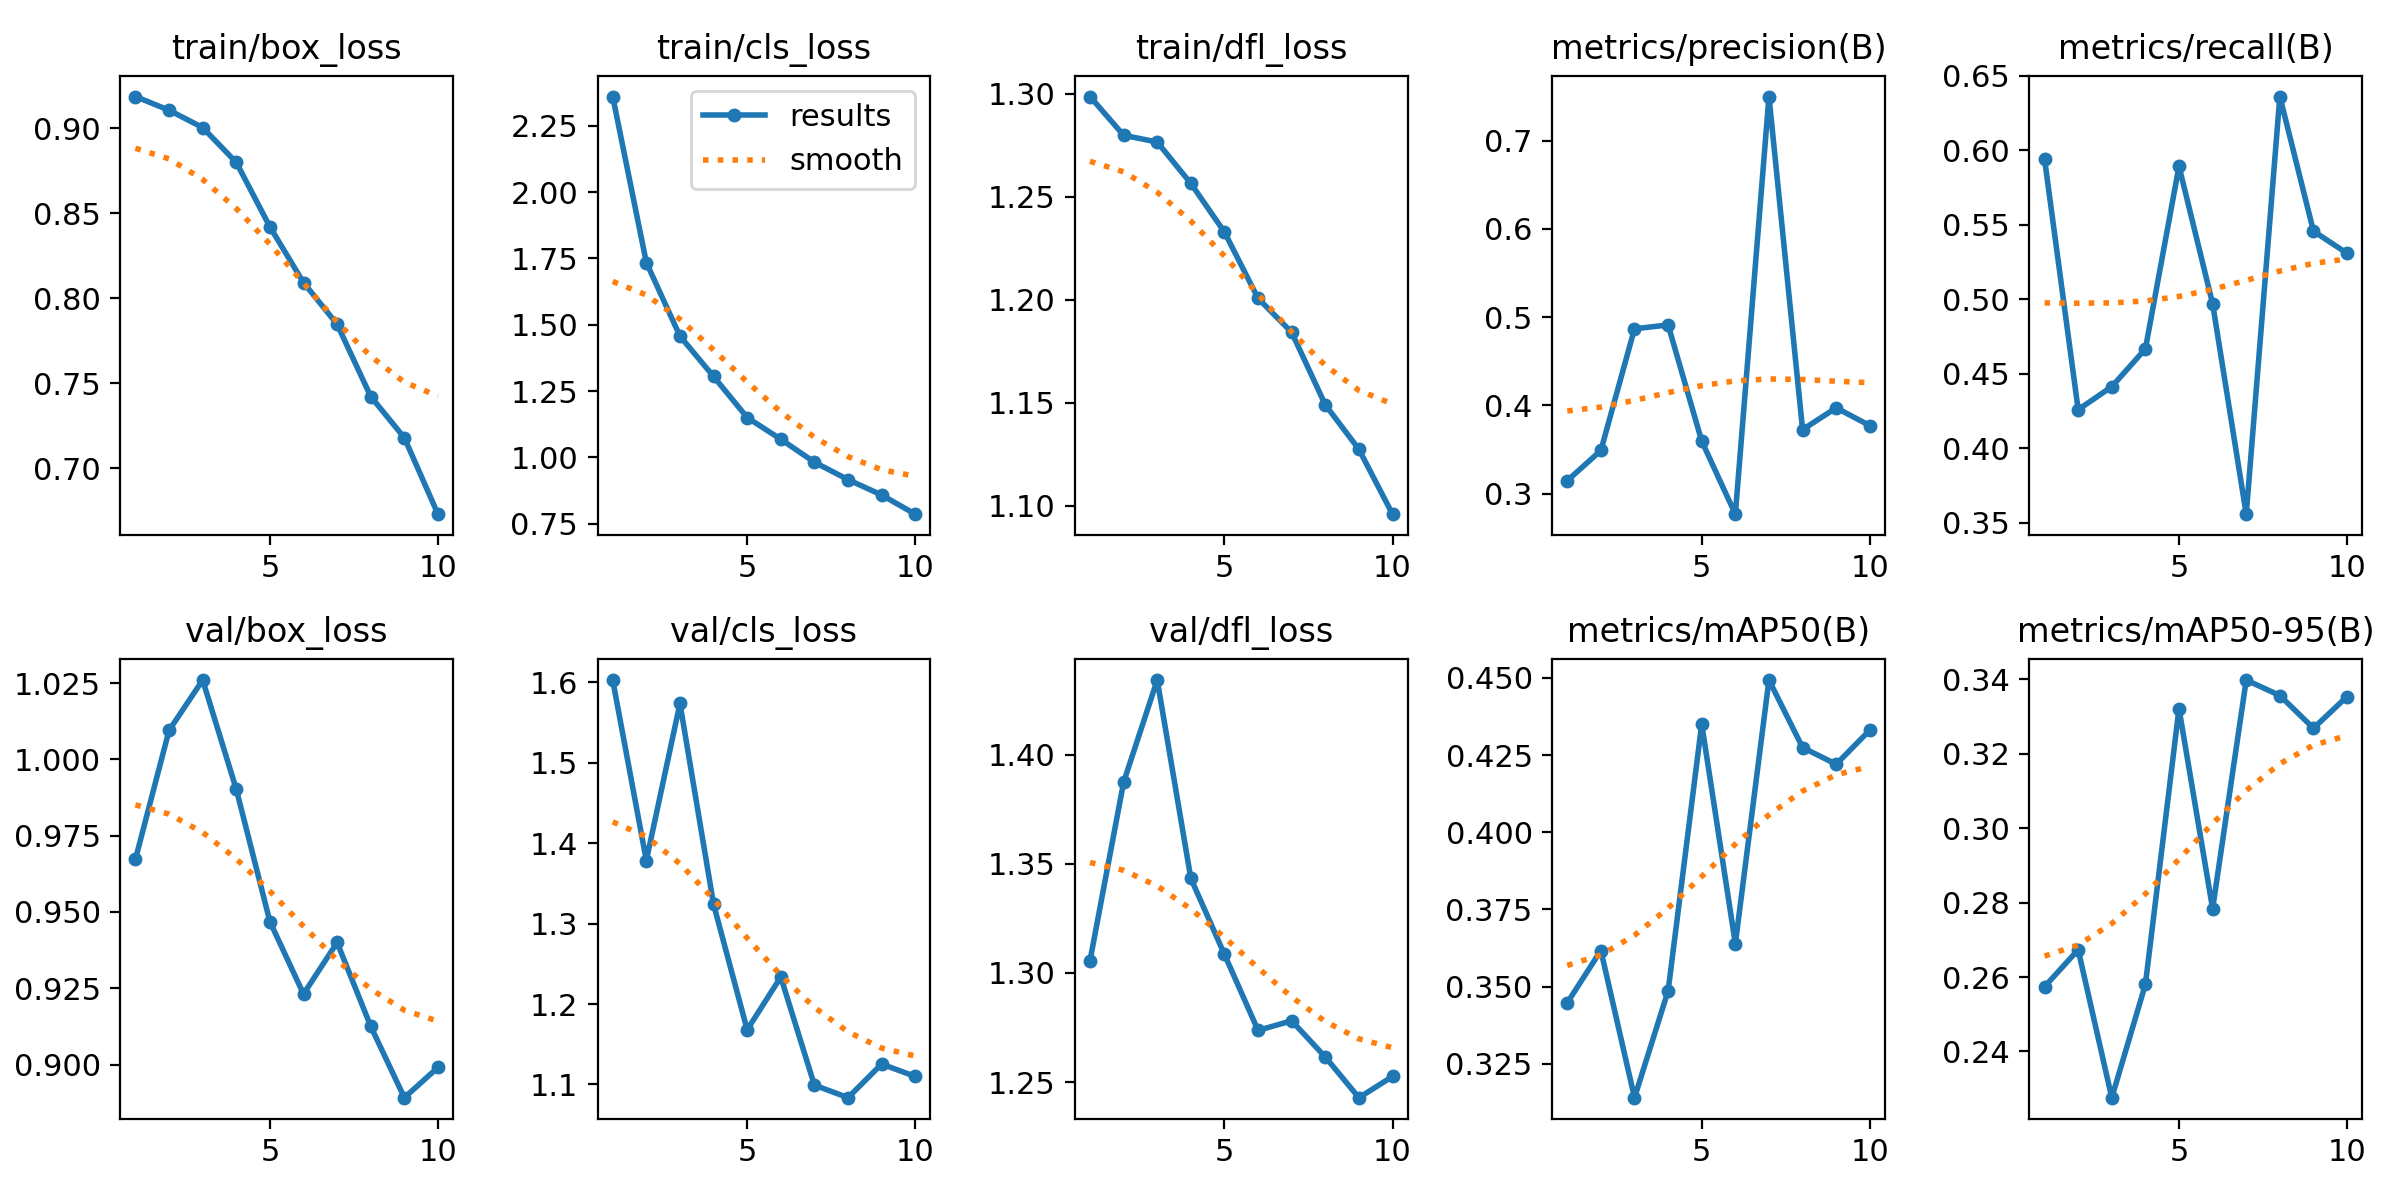

In [ ]:
Image(filename='/content/runs/detect/train/results.png', height=600)



---





---


# We use a pre-trained for tracking the cars speed

# Task 2: Exploratory Data Analysis (EDA)

* Prepare the Video Capture

In [ ]:
# Open the input video
video_path = '/content/4K Video of Highway Traffic!.mp4'
cap = cv2.VideoCapture(video_path)

* the Video's Information

In [ ]:
width = int(cap.get(3))
height = int(cap.get(4))
fps = int(cap.get(5))

In [ ]:
width

640

In [ ]:
height

360

In [ ]:
fps

29

* Prepare the Video (To save the model later)

In [ ]:
output_path = '/content/output_video_SpeedingCounter.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Task 3: Model Development

In [ ]:
# Load YOLO model
model = YOLO('/content/runs/detect/train/weights/best.pt')

In [ ]:
# Parameters
color = (0, 255, 0)
thickness = 2
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_thickness = 1

In [ ]:
# Horizontal line position (close to the bottom of the frame)
line_position_y = int(height * 0.7)  # 70% down the frame height

In [ ]:
# Speed threshold
speed_threshold = 120

# Dictionary to store the last positions of the objects
last_positions = {}

# Counter for speeding cars
speeding_cars_count = 0

* Cars Speed detection

In [ ]:
ret = True

while ret:
    ret, frame = cap.read()

    if not ret:
        break

    results = model.track(frame, persist=True)

    for result in results:
        for obj in result.boxes:
            bbox = obj.xyxy[0].cpu().numpy()  # Bounding box coordinates
            class_id = int(obj.cls[0].cpu().numpy()) if obj.cls is not None else -1  # Class ID
            conf = obj.conf[0].cpu().numpy() if obj.conf is not None else 0.0  # Confidence score
            obj_id = int(obj.id[0].cpu().numpy()) if obj.id is not None else -1  # Unique ID

            # Convert bbox coordinates to integers
            x1, y1, x2, y2 = map(int, bbox)

            # Calculate the center of the bounding box
            center_x = (x1 + x2) // 2
            center_y = (y1 + y2) // 2

            # Check if the car has crossed the line
            if center_y > line_position_y:
                if obj_id in last_positions:
                    # Calculate the speed
                    prev_center_x, prev_center_y, prev_time = last_positions[obj_id]
                    distance_px = np.sqrt((center_x - prev_center_x) ** 2 + (center_y - prev_center_y) ** 2)
                    time_elapsed = 1 / fps  # Time per frame

                    conversion_factor = 0.05  # Replace with actual value
                    speed_kmh = (distance_px * conversion_factor) / (time_elapsed / 3600)  # Speed in km/h

                    # Check if the speed exceeds the threshold
                    if speed_kmh > speed_threshold:
                        speeding_cars_count += 1

                    # Draw the speed on the frame
                    cv2.putText(frame, f'Speed: {int(speed_kmh)} km/h', (x1, y1 - 30), font, font_scale, (0, 0, 255), font_thickness, cv2.LINE_AA)

                # Update the last position of the car
                last_positions[obj_id] = (center_x, center_y, ret)

            # Draw the bounding box
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, thickness)

            # Prepare the label
            label = f'ID: {obj_id} Class: {class_id} Conf: {conf:.2f}'

            # Put the label on the frame
            cv2.putText(frame, label, (x1, y1 - 10), font, font_scale, color, font_thickness, cv2.LINE_AA)

    # Draw the speeding cars counter
    cv2.putText(frame, f'Speeding Cars: {speeding_cars_count}', (10, height - 40), font, font_scale, (255, 0, 0), font_thickness, cv2.LINE_AA)

    # Draw the horizontal line
    cv2.line(frame, (0, line_position_y), (width, line_position_y), (255, 0, 0), 2)

    out.write(frame)

cap.release()
out.release()


Streaming output truncated to the last 5000 lines.
0: 352x608 1 vehicle, 15.2ms
Speed: 2.2ms preprocess, 15.2ms inference, 4.7ms postprocess per image at shape (1, 3, 352, 608)

0: 352x608 1 vehicle, 14.1ms
Speed: 2.4ms preprocess, 14.1ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 608)

0: 352x608 1 vehicle, 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 352, 608)

0: 352x608 1 vehicle, 12.5ms
Speed: 2.5ms preprocess, 12.5ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 608)

0: 352x608 1 vehicle, 12.0ms
Speed: 2.3ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 608)

0: 352x608 1 vehicle, 11.5ms
Speed: 2.3ms preprocess, 11.5ms inference, 4.7ms postprocess per image at shape (1, 3, 352, 608)

0: 352x608 1 vehicle, 11.0ms
Speed: 2.5ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 352, 608)

0: 352x608 1 vehicle, 11.4ms
Speed: 2.3ms preprocess, 11.4ms